# Member Task: Andrew Van Es
## Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state".

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# import our deaths and cases data csv's
covD = pd.read_csv('Data/covid_deaths_usafacts.csv')
covC = pd.read_csv('Data/covid_confirmed_usafacts.csv')
covP = pd.read_csv('Data/covid_county_population_usafacts.csv')

In [2]:
# drop extra dates from the data set from table
dropped_dates = [col for col in covC.columns if (('2020-01-22' <= col <= '2020-07-01') or ('2021-01-01' < col)) and (('-' in col))]
covC.drop(columns=dropped_dates, inplace=True)

# print out the dataframe
covC.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,...,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,561,568,591,615,618,644,...,3889,3942,3990,3999,4029,4065,4105,4164,4190,4239
2,1003,Baldwin County,AL,1,751,845,863,881,911,997,...,12321,12521,12666,12708,12825,12962,13172,13392,13601,13823
3,1005,Barbour County,AL,1,335,348,350,352,356,360,...,1383,1390,1396,1398,1406,1417,1462,1492,1514,1517
4,1007,Bibb County,AL,1,179,189,190,193,197,199,...,1683,1711,1725,1739,1746,1762,1792,1817,1834,1854


In [3]:
# New Dataframe to alter
covC1 = covC.copy(deep=True)

# Create a list of columns to remove that we do not curently need
fil_columns = ['countyFIPS', 'County Name', 'StateFIPS']
covC1.drop(columns = fil_columns, inplace=True)

# Grab only counties from GA to add together
covC1 = covC1[covC1['State'] == 'GA']

covC1.head()

,State,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,...,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01
397,GA,7440,6955,6995,7359,7115,7675,8403,8924,8761,...,23268,23144,23750,24065,24154,24110,24257,24251,24741,25023
398,GA,270,279,286,290,300,302,309,315,321,...,1366,1388,1394,1403,1408,1402,1420,1441,1451,1470
399,GA,157,160,162,162,175,179,179,186,193,...,600,609,612,613,619,621,627,634,639,647
400,GA,267,279,280,281,282,284,287,293,297,...,754,765,772,781,784,794,801,802,800,811
401,GA,43,43,43,43,43,43,43,43,44,...,124,126,126,127,127,128,128,128,129,130


In [4]:
#obtaining daily values for the state of GA and drop the state column
covC2 = covC1.sum(axis=0).to_frame().T.copy(deep=True)
covC2.drop(columns='State', inplace=True)

covC2.head()

,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,...,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01
0,88481,91045,93496,95656,97728,101111,104056,108305,112216,114672,...,524055,531953,537076,540753,543707,546857,552712,558177,566675,575395


In [33]:
GACases = covC2.to_numpy()
# converting the cumulative data to the new cases per day
GACasesCumul = GACases[:, 1:] - GACases[:, :-1]

first = GACases[:, 0].reshape(-1, 1)
GACasesCumul = np.hstack((first, GACasesCumul))

# 88481 - 84967 Calculated in excel for value in first cell
GACasesCumul[0, 0] = (88481 - 84967) 

# Declare pandas.DataFrame object
GACases3 = pd.DataFrame(GACasesCumul.T, columns=['CuGAVal'])
GACases3 = GACases3.T
GACases3.head()

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
CuGAVal,3514,2564,2451,2160,2072,3383,2945,4249,3911,2456,...,5162,7898,5123,3677,2954,3150,5855,5465,8498,8720


#### We now have the daily number of cases reported for each day, we can take these values and calculate the mean median and mode for each week for the data range.

In [6]:
GACases4 = GACases3.to_numpy()
valMean = []
valMed = []
valMode = []

# for-loop which calculates the mean, median, and mode, iterating for each week
for i in range(0, GACases4.shape[1], 7):
    week = GACases4[:, i:i+7]
    
    # Get the mean
    valMean.append(np.mean(week))
    # Get the median
    valMed.append(np.median(week))
    # Get the mode
    cmodArr = stats.mode(week, axis = None, keepdims=True)
    valMode.append(cmodArr[0])

# pushes the values into a data frame for each one
case_ga_means1 = pd.DataFrame({'Case Mean': valMean})
case_ga_medians1 = pd.DataFrame({'Case Median': valMed})
case_ga_mode1 = pd.DataFrame({'Case Mode': valMode})

# adds week_ to each column for clarity
case_ga_mode1 = case_ga_mode1.T.add_prefix('Week_')
case_ga_means1 = case_ga_means1.T.add_prefix('Week_')
case_ga_medians1 = case_ga_medians1.T.add_prefix('Week_')     

case_ga_means1.head(40)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_12652\3115992484.py:15: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  cmodArr = stats.mode(week, axis = None, keepdims=True)


,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,...,Week_17,Week_18,Week_19,Week_20,Week_21,Week_22,Week_23,Week_24,Week_25,Week_26
Case Mean,2727,3396,3457,3754,3341,3484,2554,2371,1999,1815,...,1635,1607,2322,2438,2568,3876,4603,5102,4874,8609


In [7]:
case_ga_mode1.head(40)

,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,...,Week_17,Week_18,Week_19,Week_20,Week_21,Week_22,Week_23,Week_24,Week_25,Week_26
Case Mode,[3514],[4249],[3431],[4596],[3961],[3191],[2556],[2755],[2465],[2679],...,[1804],[1730],[2492],[2656],[2904],[4371],[6062],[5825],[7898],[8498]


In [8]:
case_ga_medians1.head(40)

,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,...,Week_17,Week_18,Week_19,Week_20,Week_21,Week_22,Week_23,Week_24,Week_25,Week_26
Case Median,2564,3874,3248,3779,3650,3514,2556,2284,2214,1944,...,1682,1730,2489,2431,2634,3751,4730,5162,5123,8609


#### We now have our mean, median and mode for our state cases. Now we repeat the process for deaths in GA

In [9]:
dropped_dates = [col for col in covD.columns if (('2020-01-22' <= col <= '2020-07-01') or ('2021-01-01' < col)) and (('-' in col))]
covD.drop(columns=dropped_dates, inplace=True)

# New Dataframe to alter
covD1 = covD.copy(deep=True)

# Create a list of columns to remove that we do not curently need
fil_columns = ['countyFIPS', 'County Name', 'StateFIPS']
covD1.drop(columns = fil_columns, inplace=True)

# Grab only counties from GA to add together
covD1 = covD1[covD1['State'] == 'GA']

covD1.head()

,State,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,...,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01
397,GA,50,50,50,50,51,51,52,49,52,...,247,247,249,254,254,254,256,260,261,262
398,GA,14,14,14,14,14,14,14,14,14,...,42,42,42,42,42,42,42,43,43,43
399,GA,2,2,2,2,2,2,2,2,2,...,9,9,9,9,9,9,9,9,9,9
400,GA,4,4,4,4,4,4,5,5,5,...,21,21,21,21,21,21,21,21,21,21
401,GA,3,3,3,3,3,3,3,3,3,...,6,6,6,6,6,6,6,6,6,6


In [10]:
#obtaining daily death values for the state of GA and droping state column
covD2 = covD1.sum(axis=0).to_frame().T.copy(deep=True)
covD2.drop(columns='State', inplace=True)

covD2.head()

,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,...,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01
0,2852,2856,2859,2860,2882,2902,2923,2937,2992,2996,...,9554,9607,9656,9708,9713,9718,9759,9808,9872,9889


In [11]:
GADeaths4 = covD2.to_numpy()
valMean = []
valMed = []
valMode = []

for i in range(0, GADeaths4.shape[1], 7):
    week = GADeaths4[:, i:i+7]
    
    # mean function
    valMean.append(np.mean(week))
    # median function
    valMed.append(np.median(week))
    # mode function
    cmodArr = stats.mode(week, axis = None, keepdims=True)
    valMode.append(cmodArr[0])

# save the values into a data frame for later manipulation
deaths_ga_means1 = pd.DataFrame({'Death Mean': valMean})
deaths_ga_medians1 = pd.DataFrame({'Death Median': valMed})
deaths_ga_mode1 = pd.DataFrame({'Death Mode': valMode})

deaths_ga_mode1 = deaths_ga_mode1.T.add_prefix('Week_')
deaths_ga_means1 = deaths_ga_means1.T.add_prefix('Week_')
deaths_ga_medians1 = deaths_ga_medians1.T.add_prefix('Week_')     

deaths_ga_means1.head()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_12652\3666527100.py:14: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  cmodArr = stats.mode(week, axis = None, keepdims=True)


,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,...,Week_17,Week_18,Week_19,Week_20,Week_21,Week_22,Week_23,Week_24,Week_25,Week_26
Death Mean,2876,3011,3179,3491,3832,4218,4688,5115,5595,6000,...,7983,8207,8449,8617,8771,8976,9208,9447,9709,9880


In [12]:
deaths_ga_medians1.head()

,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,...,Week_17,Week_18,Week_19,Week_20,Week_21,Week_22,Week_23,Week_24,Week_25,Week_26
Death Median,2860,2999,3171,3495,3839,4194,4698,5125,5599,6031,...,7973,8191,8448,8616,8775,8969,9204,9436,9713,9880


In [13]:
deaths_ga_mode1.head()

,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,...,Week_17,Week_18,Week_19,Week_20,Week_21,Week_22,Week_23,Week_24,Week_25,Week_26
Death Mode,[2852],[2937],[3103],[3508],[3671],[4023],[4537],[4899],[5387],[5859],...,[7912],[8116],[8393],[8555],[8713],[8876],[9122],[9356],[9607],[9872]


#### We now also have the mean, median and mode for the deaths in GA. We can now graph the two sets of data and compare the rates of cases and deaths over the selected date range.
note: the deaths dataframe is already in a daily form so we don't need to run it through the daily values formula.

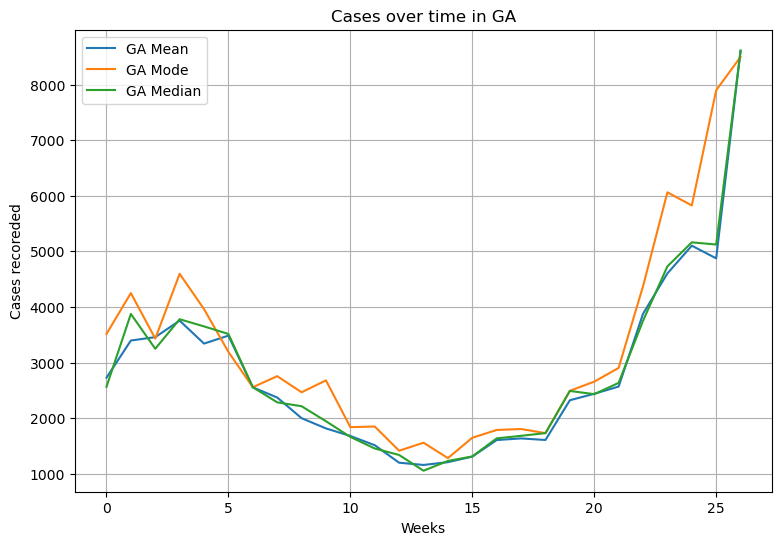

In [14]:
# Creating a plot to visualize the Cases data in GA
# Normalizing the data per 10000 - commented out displays raw data
GaCMean = case_ga_means1.to_numpy() #/10617423)*10000
GaCMode = case_ga_mode1.to_numpy() #/10617423)*10000
GaCMedian = case_ga_medians1.to_numpy() #/10617423)*10000

x = np.arange(GaCMean.shape[1])

# Creating the figure and adding in each array into the plot
plt.figure(figsize=(9,6))
plt.plot(x, GaCMean[0, :], label='GA Mean', marker='', linestyle='-')
plt.plot(x, GaCMode[0, :], label='GA Mode', marker='', linestyle='-')
plt.plot(x, GaCMedian[0, :], label='GA Median', marker='', linestyle='-')


plt.xlabel('Weeks')
plt.ylabel('Cases recoreded')
plt.title('Cases over time in GA')
plt.legend()

plt.grid(True)

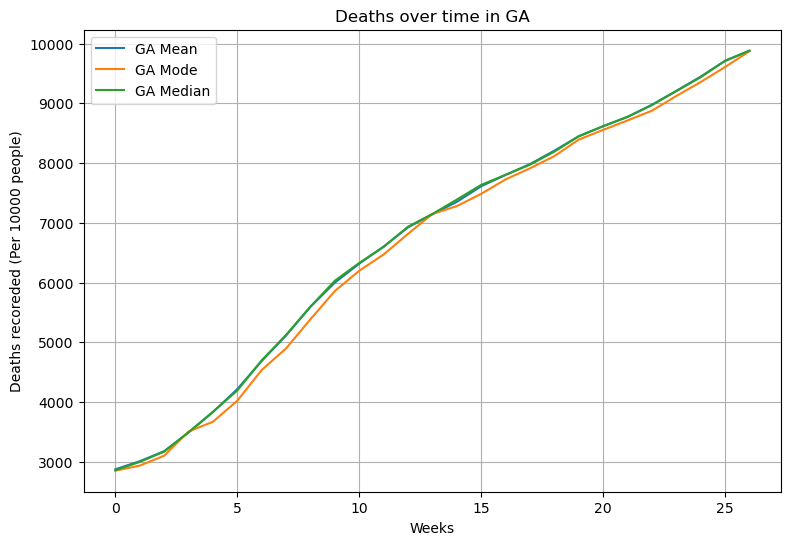

In [15]:
# Creating a plot to visualize the Deaths data in GA
# normialzing the data per 10000 - commented out to display raw data
GaDMean = deaths_ga_means1.to_numpy() #/10617423)*10000
GaDMode = deaths_ga_mode1.to_numpy() #/10617423)*10000
GaDMedian = deaths_ga_medians1.to_numpy() #/10617423)*10000

x = np.arange(GaDMean.shape[1])

plt.figure(figsize=(9,6))
plt.plot(x, GaDMean[0, :], label='GA Mean', marker='', linestyle='-')
plt.plot(x, GaDMode[0, :], label='GA Mode', marker='', linestyle='-')
plt.plot(x, GaDMedian[0, :], label='GA Median', marker='', linestyle='-')

plt.xlabel('Weeks')
plt.ylabel('Deaths recoreded (Per 10000 people)')
plt.title('Deaths over time in GA')
plt.legend()

plt.grid(True)

#### looking at the graph we can see that mean, median and mode all give us pretty similar results and shows us a that there was an increase of cases during the summer months where plenty of people traveling for summer vacation, it then dips down and as we approach the later months like November and December there is an even greater increase of cases which can be attributed to people traveling for holidays to see family and friends.
#### In contrast, the deaths graph is consistently increasing and has a very noticeable upward trend. The reason for this could be the people who get infected don't immediately die from covid, and the time it takes for them to pass could range from a couple weeks to months.

### Compare with five other states (TX, FL, NC, SC, NV)
#### We'll start by making five data frames for each state and work from there

In [16]:
# New Dataframe to alter
covC5 = covC.copy(deep=True)
covD5 = covD.copy(deep=True)

# Create a list of columns to remove that we do not curently need
fil_columns = ['countyFIPS', 'County Name', 'StateFIPS']
covC5.drop(columns = fil_columns, inplace=True)
covD5.drop(columns = fil_columns, inplace=True)

# Grab counties from their repective states and add them together into a dataframe
covCTX = covC5[covC5['State'] == 'TX']
covCFL = covC5[covC5['State'] == 'FL']
covCNC = covC5[covC5['State'] == 'NC']
covCSC = covC5[covC5['State'] == 'SC']
covCNV = covC5[covC5['State'] == 'NV']

covDTX = covD5[covD5['State'] == 'TX']
covDFL = covD5[covD5['State'] == 'FL']
covDNC = covD5[covD5['State'] == 'NC']
covDSC = covD5[covD5['State'] == 'SC']
covDNV = covD5[covD5['State'] == 'NV']

Here we are adding all the daily county values per state and droping the state column, so we have a clean array we can manipulate

In [17]:
#obtaining daily values for the state of TX cases
covCTX2 = covCTX.sum(axis=0).to_frame().T.copy(deep=True)
covCTX2.drop(columns='State', inplace=True)

#obtaining daily values for the state of FL cases
covCFL2 = covCFL.sum(axis=0).to_frame().T.copy(deep=True)
covCFL2.drop(columns='State', inplace=True)

#obtaining daily values for the state of NC cases
covCNC2 = covCNC.sum(axis=0).to_frame().T.copy(deep=True)
covCNC2.drop(columns='State', inplace=True)

#obtaining daily values for the state of SC cases
covCSC2 = covCSC.sum(axis=0).to_frame().T.copy(deep=True)
covCSC2.drop(columns='State', inplace=True)

#obtaining daily values for the state of NV cases
covCNV2 = covCNV.sum(axis=0).to_frame().T.copy(deep=True)
covCNV2.drop(columns='State', inplace=True)

#obtaining daily values for the state of TX deaths
covDTX2 = covDTX.sum(axis=0).to_frame().T.copy(deep=True)
covDTX2.drop(columns='State', inplace=True)

#obtaining daily values for the state of FL deaths
covDFL2 = covDFL.sum(axis=0).to_frame().T.copy(deep=True)
covDFL2.drop(columns='State', inplace=True)

#obtaining daily values for the state of NC deaths
covDNC2 = covDNC.sum(axis=0).to_frame().T.copy(deep=True)
covDNC2.drop(columns='State', inplace=True)

#obtaining daily values for the state of SC deaths
covDSC2 = covDSC.sum(axis=0).to_frame().T.copy(deep=True)
covDSC2.drop(columns='State', inplace=True)

#obtaining daily values for the state of NV deaths
covDNV2 = covDNV.sum(axis=0).to_frame().T.copy(deep=True)
covDNV2.drop(columns='State', inplace=True)

#### Now, well start by creating some functions in which can help us to make the process of manipulating the tables a little easier.

In [18]:
# this function is used to manipulate the data into its daily value form
def Cumulative_array(array_def, begin_val):
    CumulativeArr = array_def[:, 1:] - array_def[:, :-1]
    first = array_def[:, 0].reshape(-1, 1)
    CumulativeArr = np.hstack((first, CumulativeArr))
    CumulativeArr[0, 0] = begin_val
    
    return CumulativeArr

# function is used to find the mean, median and mode of a numpy array
def calculate_statistics(data_array):
    
    #variables to store the statisic data
    valMean = []
    valMed = []
    valMode = []

    for i in range(0, data_array.shape[1], 7):
        week = data_array[:, i:i+7]
        
        # two functions to find our mean and median of 7 day intervals
        valMean.append(np.mean(week))
        valMed.append(np.median(week))
        
        # function to find our mode of the 7 day intervals
        cmodArr = stats.mode(week, axis = None, keepdims=True)
        valMode.append(cmodArr[0])

    return valMean, valMed, valMode

In [19]:
# convert the dfs to arrays of cumulative values for ecah state of cases and deaths
# Begin Values were made in excel
TXCasesCumul = Cumulative_array(covCTX2.to_numpy(), 7915)
FLCasesCumul = Cumulative_array(covCFL2.to_numpy(), 10109)
NCCasesCumul = Cumulative_array(covCNC2.to_numpy(), 1640)
SCCasesCumul = Cumulative_array(covCSC2.to_numpy(), 1778)
NVCasesCumul = Cumulative_array(covCNV2.to_numpy(), 631)

# deaths calcualtions - alter keep this way to reduce errors
TXDeathsCumul = covDTX2.to_numpy()
FLDeathsCumul = covDFL2.to_numpy()
NCDeathsCumul = covDNC2.to_numpy()
SCDeathsCumul = covDSC2.to_numpy()
NVDeathsCumul = covDNV2.to_numpy()

In [20]:
# Call the function to return the mean median and mode of each data set for 5 states
TXC_means, TXC_med, TXC_mode = calculate_statistics(TXCasesCumul)
FLC_means, FLC_med, FLC_mode = calculate_statistics(FLCasesCumul)
NCC_means, NCC_med, NCC_mode = calculate_statistics(NCCasesCumul)
SCC_means, SCC_med, SCC_mode = calculate_statistics(SCCasesCumul)
NVC_means, NVC_med, NVC_mode = calculate_statistics(NVCasesCumul)

# calculations for the deaths of the 5 states
TXD_means, TXD_med, TXD_mode = calculate_statistics(TXDeathsCumul)
FLD_means, FLD_med, FLD_mode = calculate_statistics(FLDeathsCumul)
NCD_means, NCD_med, NCD_mode = calculate_statistics(NCDeathsCumul)
SCD_means, SCD_med, SCD_mode = calculate_statistics(SCDeathsCumul)
NVD_means, NVD_med, NVD_mode = calculate_statistics(NVDeathsCumul)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_12652\926931812.py:26: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  cmodArr = stats.mode(week, axis = None, keepdims=True)


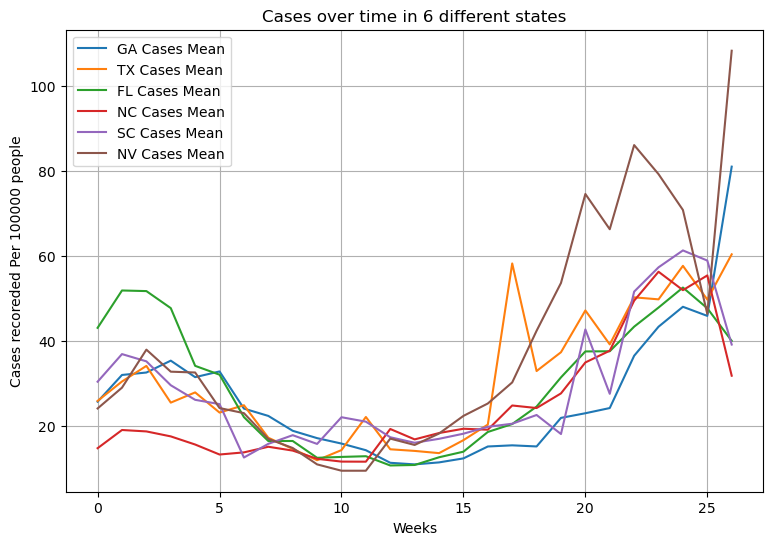

In [21]:
# We can now plot the cases of the 6 states
case_tx_means = pd.DataFrame({'Values': TXC_means})
case_fl_means = pd.DataFrame({'Values': FLC_means})
case_nc_means = pd.DataFrame({'Values': NCC_means})
case_sc_means = pd.DataFrame({'Values': SCC_means})
case_nv_means = pd.DataFrame({'Values': NVC_means})

# prepare the variables and display them in normalized form per 100,000
# populations were pre-prepared from excel
GaCMean = (case_ga_means1.to_numpy()/10617423)*100000
TxCMean = (case_tx_means.T.to_numpy()/28995881)*100000
FlCMean = (case_fl_means.T.to_numpy()/21477737)*100000
NCCMean = (case_nc_means.T.to_numpy()/10488084)*100000
SCCMean = (case_sc_means.T.to_numpy()/5148714)*100000
NVCMean = (case_nv_means.T.to_numpy()/3080156)*100000

x = np.arange(GaCMean.shape[1])

plt.figure(figsize=(9,6))
plt.plot(x, GaCMean[0, :], label='GA Cases Mean', marker='', linestyle='-')
plt.plot(x, TxCMean[0, :], label='TX Cases Mean', marker='', linestyle='-')
plt.plot(x, FlCMean[0, :], label='FL Cases Mean', marker='', linestyle='-')
plt.plot(x, NCCMean[0, :], label='NC Cases Mean', marker='', linestyle='-')
plt.plot(x, SCCMean[0, :], label='SC Cases Mean', marker='', linestyle='-')
plt.plot(x, NVCMean[0, :], label='NV Cases Mean', marker='', linestyle='-')

plt.xlabel('Weeks')
plt.ylabel('Cases recoreded Per 100000 people')
plt.title('Cases over time in 6 different states')
plt.legend()

plt.grid(True)

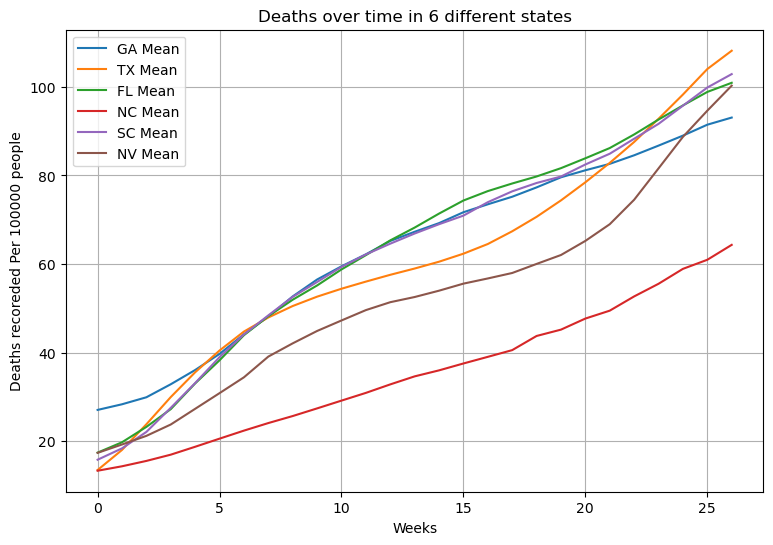

In [22]:
# converted to dataframes to solve errors with normalization
death_tx_means = pd.DataFrame({'Values': TXD_means})
death_fl_means = pd.DataFrame({'Values': FLD_means})
death_nc_means = pd.DataFrame({'Values': NCD_means})
death_sc_means = pd.DataFrame({'Values': SCD_means})
death_nv_means = pd.DataFrame({'Values': NVD_means})

# prepare the variables and display them in normalized form
GaDMean = (deaths_ga_means1.to_numpy()/10617423)*100000
TxDMean = (death_tx_means.T.to_numpy()/28995881)*100000
FlDMean = (death_fl_means.T.to_numpy()/21477737)*100000
NCDMean = (death_nc_means.T.to_numpy()/10488084)*100000
SCDMean = (death_sc_means.T.to_numpy()/5148714)*100000
NVDMean = (death_nv_means.T.to_numpy()/3080156)*100000

x = np.arange(GaDMean.shape[1])

plt.figure(figsize=(9,6))
plt.plot(x, GaDMean[0, :], label='GA Mean', marker='', linestyle='-')
plt.plot(x, TxDMean[0, :], label='TX Mean', marker='', linestyle='-')
plt.plot(x, FlDMean[0, :], label='FL Mean', marker='', linestyle='-')
plt.plot(x, NCDMean[0, :], label='NC Mean', marker='', linestyle='-')
plt.plot(x, SCDMean[0, :], label='SC Mean', marker='', linestyle='-')
plt.plot(x, NVDMean[0, :], label='NV Mean', marker='', linestyle='-')

plt.xlabel('Weeks')
plt.ylabel('Deaths recoreded Per 100000 people')
plt.title('Deaths over time in 6 different states')
plt.legend()

plt.grid(True)

#### Describe why the rates differ acroos the states
With the cases graph all the states are pretty close together starting out. The reason for them being somewhat high starting out could have to do with July and August being months where people might go to the beach to have fun, which might give us a clue as to why Florida has higher case rates at the beginning of the graph. The second more noticeable peek is towards the colder months of December and November which are months that people would travel for holidays which would only help to spread covid and cause an increase in both deaths and cases.
With the deaths graph the deaths are steadily climbing over the weeks which could be attributed to some people dying faster or slower depending on their age and health issues.
These to graph match pretty closely to the US stats where it starts to climb faster as it appraches the colder months of November and December.

###  Identify five counties within a state of your choice with high cases and death rates.
#### to start we will create new dataframes to modify and merge them with the population so we can calculate the rates of cases and deaths by dividing number of infections from july to december by the population of the state and multiplying that value by 100

In [23]:
covRC = covC.copy(deep=True)
covRD = covD.copy(deep=True)

# Grab only counties from GA to add together
covRC1 = covRC[covRC['State'] == 'GA'].copy(deep=True)
covRD1 = covRD[covRD['State'] == 'GA'].copy(deep=True)

# set up the data ranges and drop the all the other dates
dropped_dates = [col for col in covRC1.columns if (('2020-01-22' <= col <= '2020-07-01') or ('2021-01-01' <= col)) and (('-' in col))]
covRC1.drop(columns=dropped_dates, inplace=True)

dropped_dates = [col for col in covRD1.columns if (('2020-01-22' <= col <= '2020-07-01') or ('2021-01-01' <= col)) and (('-' in col))]
covRD1.drop(columns=dropped_dates, inplace=True)

# Create a list of columns to remove that we do not curently need
fil_columns = ['countyFIPS', 'State', 'StateFIPS']
covRC1.drop(columns = fil_columns, inplace=True)
covRD1.drop(columns = fil_columns, inplace=True)

# Remove spaces from county names, causing errors with merge
covRC1['County Name'] = covRC1['County Name'].str.replace(' ', '')
covRD1['County Name'] = covRD1['County Name'].str.replace(' ', '')

covRD1.head()

,County Name,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
397,StatewideUnallocated,50,50,50,50,51,51,52,49,52,...,248,247,247,249,254,254,254,256,260,261
398,ApplingCounty,14,14,14,14,14,14,14,14,14,...,42,42,42,42,42,42,42,42,43,43
399,AtkinsonCounty,2,2,2,2,2,2,2,2,2,...,9,9,9,9,9,9,9,9,9,9
400,BaconCounty,4,4,4,4,4,4,5,5,5,...,21,21,21,21,21,21,21,21,21,21
401,BakerCounty,3,3,3,3,3,3,3,3,3,...,6,6,6,6,6,6,6,6,6,6


In [24]:
covP1 = covP.copy(deep=True)

covP1['County Name'] = covP1['County Name'].str.replace(' ', '')

covP1 = covP1[covP1['State'] == 'GA'].copy(deep=True)
fil_columns = ['countyFIPS', 'State']
covP1.drop(columns = fil_columns, inplace=True)

covRC2 = pd.merge(covP1, covRC1, on='County Name', how="inner")
covRCcal = covRC2[['County Name', 'population', '2020-07-02', '2020-12-31']].copy(deep = True)

# caluclating rates of infection from july to december
covRCcal['Rate Of Infection'] = (((covRCcal['2020-12-31'] - covRCcal['2020-07-02'])/covRCcal['population'])*100)

# drop the frist row since it has a population of 0 for statewide unallocated
covRCcal = covRCcal.drop(0)

# sort the table so we can see the to five most affected counties
covRCcal = covRCcal.sort_values(by=['Rate Of Infection'], ascending=False)

# display the first five rows to get the counties with the highest rates of cases
covRCcal.head(5)

,County Name,population,2020-07-02,2020-12-31,Rate Of Infection
26,ChattahoocheeCounty,10907,426,2163,15.925552
155,WhitfieldCounty,104628,1197,10831,9.207860
127,StephensCounty,25925,249,2170,7.409836
128,StewartCounty,6621,146,611,7.023108
69,HallCounty,204441,3330,17469,6.915932


In [25]:
covRD2 = pd.merge(covP1, covRD1, on='County Name', how="inner")
covRDcal = covRD2[['County Name', 'population', '2020-07-02', '2020-12-31']].copy(deep = True)

# caluclating rates of infection from july to december
covRDcal['Rate Of Death'] = (((covRDcal['2020-12-31'] - covRDcal['2020-07-02'])/covRDcal['population'])*100)

# drop the frist row since it has a population of 0 for statewide unallocated
covRDcal = covRDcal.drop(0)

# sort the table so we can see the to five most affected counties
covRDcal = covRDcal.sort_values(by=['Rate Of Death'], ascending=False)

# display the first five rows to get the counties with the highest rates of death
covRDcal.head(5)

,County Name,population,2020-07-02,2020-12-31,Rate Of Death
83,JohnsonCounty,9643,2,30,0.290366
21,CandlerCounty,10803,0,28,0.259187
82,JenkinsCounty,8676,12,34,0.253573
81,JeffersonCounty,15362,1,38,0.240854
87,LaurensCounty,47546,1,113,0.235561


#### Now we have obtained the five counties with the highest rates of death and the five counties with the highest rates of infection

In [26]:
# start by creating Dataframe for all the GA counties listed above for deaths or cases
covRC_Chatta = covRC1[covRC1['County Name'] == 'ChattahoocheeCounty'].copy(deep=True)
covRC_Whit = covRC1[covRC1['County Name'] == 'WhitfieldCounty'].copy(deep=True)
covRC_Step = covRC1[covRC1['County Name'] == 'StephensCounty'].copy(deep=True)
covRC_Stew = covRC1[covRC1['County Name'] == 'StewartCounty'].copy(deep=True)
covRC_Hall = covRC1[covRC1['County Name'] == 'HallCounty'].copy(deep=True)

# repeat for the counties with the highest rates of death
covRD_John = covRD1[covRD1['County Name'] == 'JohnsonCounty'].copy(deep=True)
covRD_Cand = covRD1[covRD1['County Name'] == 'CandlerCounty'].copy(deep=True)
covRD_Jenk = covRD1[covRD1['County Name'] == 'JenkinsCounty'].copy(deep=True)
covRD_Jeff = covRD1[covRD1['County Name'] == 'JeffersonCounty'].copy(deep=True)
covRD_Laur = covRD1[covRD1['County Name'] == 'LaurensCounty'].copy(deep=True)

# drop the county name column
covRC_Chatta.drop(columns = ['County Name'], inplace=True)
covRC_Whit.drop(columns = ['County Name'], inplace=True)
covRC_Step.drop(columns = ['County Name'], inplace=True)
covRC_Stew.drop(columns = ['County Name'], inplace=True)
covRC_Hall.drop(columns = ['County Name'], inplace=True)
covRD_John.drop(columns = ['County Name'], inplace=True)
covRD_Cand.drop(columns = ['County Name'], inplace=True)
covRD_Jenk.drop(columns = ['County Name'], inplace=True)
covRD_Jeff.drop(columns = ['County Name'], inplace=True)
covRD_Laur.drop(columns = ['County Name'], inplace=True)

In [27]:
# function is used to get the values per day and not the 
# total cases at that point
covRC_Chatta_arr = Cumulative_array(covRC_Chatta.to_numpy(), 0)
covRC_Whit_arr = Cumulative_array(covRC_Whit.to_numpy(), 0)
covRC_Step_arr = Cumulative_array(covRC_Step.to_numpy(), 0)
covRD_Stew_arr = Cumulative_array(covRC_Stew.to_numpy(), 0)
covRD_Hall_arr = Cumulative_array(covRC_Hall.to_numpy(), 0)

# death does not need the array since the values are already daily
covRD_John_arr = covRD_John.to_numpy()
covRD_Cand_arr = covRD_Cand.to_numpy()
covRD_Jenk_arr = covRD_Jenk.to_numpy()
covRD_Jeff_arr = covRD_Jeff.to_numpy()
covRD_Laur_arr = covRD_Laur.to_numpy()

In [28]:
# Call the function to return the mean median and mode of each data set for 5 states
Chatta_means, Chatta_med, Chatta_mode = calculate_statistics(covRC_Chatta_arr)
Whit_means, Whit_med, Whit_mode = calculate_statistics(covRC_Whit_arr)
Step_means, Step_med, Step_mode = calculate_statistics(covRC_Step_arr)
Stew_means, Stew_med, Stew_mode = calculate_statistics(covRD_Stew_arr)
Hall_means, Hall_med, Hall_mode = calculate_statistics(covRD_Hall_arr)

# calculations for the deaths of the 5 states
John_means, John_med, John_mode = calculate_statistics(covRD_John_arr)
Cand_means, Cand_med, Cand_mode = calculate_statistics(covRD_Cand_arr)
Jenk_means, Jenk_med, Jenk_mode = calculate_statistics(covRD_Jenk_arr)
Jeff_means, Jeff_med, Jeff_mode = calculate_statistics(covRD_Jeff_arr)
Laur_means, Laur_med, Laur_mode = calculate_statistics(covRD_Laur_arr)

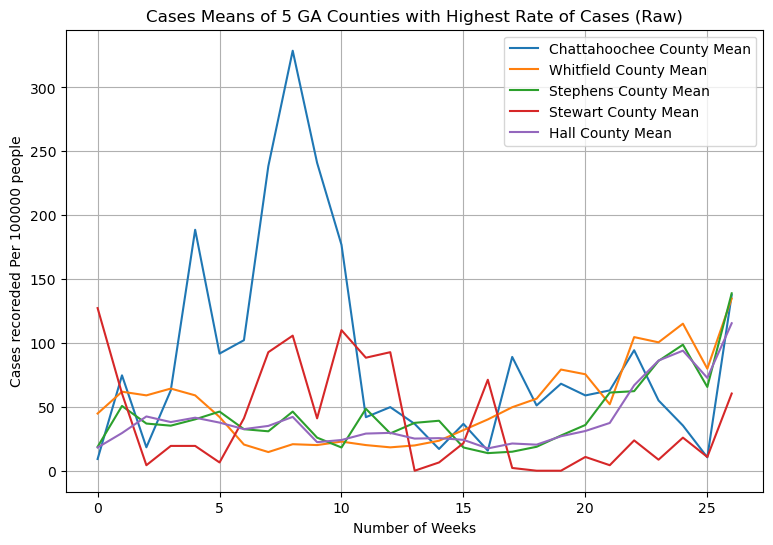

In [29]:
case_chatta_means = pd.DataFrame({'Values': Chatta_means})
case_whit_means = pd.DataFrame({'Values': Whit_means})
case_step_means = pd.DataFrame({'Values': Step_means})
case_stew_means = pd.DataFrame({'Values': Stew_means})
case_hall_means = pd.DataFrame({'Values': Hall_means})

# prepare the variables and display them in log normalized form
ChattaCMean = (case_chatta_means.T.to_numpy()/10907)*100000
WhitCMean = (case_whit_means.T.to_numpy()/104628)*100000
StepCMean = (case_step_means.T.to_numpy()/25925)*100000
StewCMean = (case_stew_means.T.to_numpy()/6621)*100000
HallCMean = (case_hall_means.T.to_numpy()/204441)*100000

x = np.arange(ChattaCMean.shape[1])

plt.figure(figsize=(9,6))
plt.plot(x, ChattaCMean[0, :], label='Chattahoochee County Mean', marker='', linestyle='-')
plt.plot(x, WhitCMean[0, :], label='Whitfield County Mean', marker='', linestyle='-')
plt.plot(x, StepCMean[0, :], label='Stephens County Mean', marker='', linestyle='-')
plt.plot(x, StewCMean[0, :], label='Stewart County Mean', marker='', linestyle='-')
plt.plot(x, HallCMean[0, :], label='Hall County Mean', marker='', linestyle='-')

plt.xlabel('Number of Weeks')
plt.ylabel('Cases recoreded Per 100000 people')
plt.title('Cases Means of 5 GA Counties with Highest Rate of Cases (Raw)')
plt.legend()

plt.grid(True)

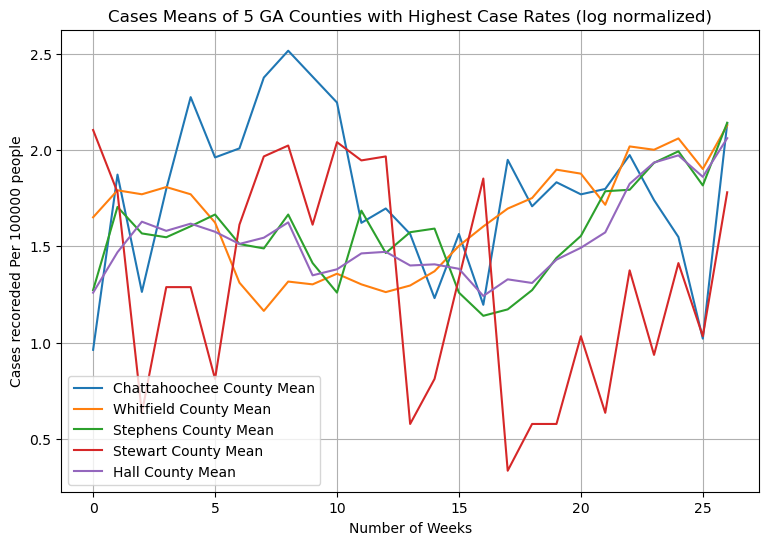

In [30]:
# making an exception to replace the zeros with 0.25
stewExcep = case_stew_means.T.to_numpy()
stewExcep[stewExcep == 0] = 0.25

# prepare the variables and display them in log normalized form
ChattaCMean = np.log10((case_chatta_means.T.to_numpy()/10907)*100000)
WhitCMean = np.log10((case_whit_means.T.to_numpy()/104628)*100000)
StepCMean = np.log10((case_step_means.T.to_numpy()/25925)*100000)
StewCMean = np.log10((stewExcep/6621)*100000)
HallCMean = np.log10((case_hall_means.T.to_numpy()/204441)*100000)

x = np.arange(ChattaCMean.shape[1])

plt.figure(figsize=(9,6))
plt.plot(x, ChattaCMean[0, :], label='Chattahoochee County Mean', marker='', linestyle='-')
plt.plot(x, WhitCMean[0, :], label='Whitfield County Mean', marker='', linestyle='-')
plt.plot(x, StepCMean[0, :], label='Stephens County Mean', marker='', linestyle='-')
plt.plot(x, StewCMean[0, :], label='Stewart County Mean', marker='', linestyle='-')
plt.plot(x, HallCMean[0, :], label='Hall County Mean', marker='', linestyle='-')

plt.xlabel('Number of Weeks')
plt.ylabel('Cases recoreded Per 100000 people')
plt.title('Cases Means of 5 GA Counties with Highest Case Rates (log normalized)')
plt.legend()

plt.grid(True)

#### *Stewart county had to have modifications to set 0 values to 0.25 to fill gaps in the line.

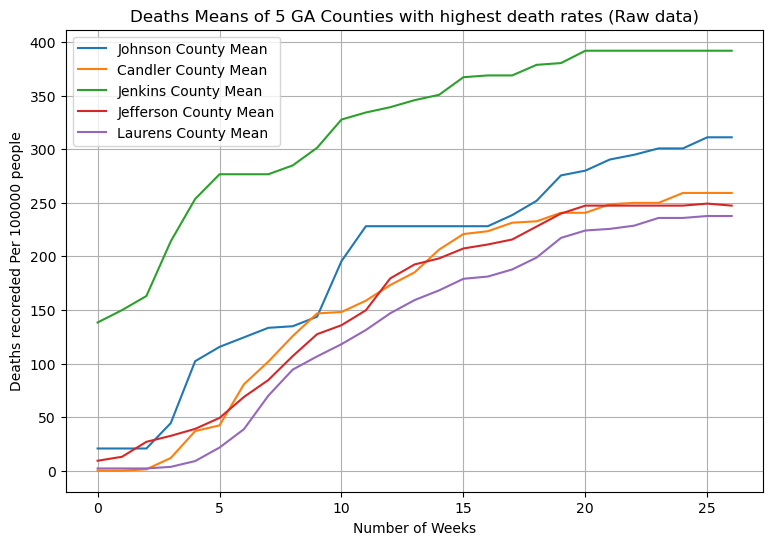

In [31]:
d_john_means = pd.DataFrame({'Values': John_means})
d_cand_means = pd.DataFrame({'Values': Cand_means})
d_jenk_means = pd.DataFrame({'Values': Jenk_means})
d_jeff_means = pd.DataFrame({'Values': Jeff_means})
d_laur_means = pd.DataFrame({'Values': Laur_means})

# prepare the variables and display them in log normalized form
JohnCMean = (d_john_means.T.to_numpy()/9643)*100000
CandCMean = (d_cand_means.T.to_numpy()/10803)*100000
JenkCMean = (d_jenk_means.T.to_numpy()/8676)*100000
JeffCMean = (d_jeff_means.T.to_numpy()/15362)*100000
LaurCMean = (d_laur_means.T.to_numpy()/47546)*100000

x = np.arange(JohnCMean.shape[1])

plt.figure(figsize=(9,6))
plt.plot(x, JohnCMean[0, :], label='Johnson County Mean', marker='', linestyle='-')
plt.plot(x, CandCMean[0, :], label='Candler County Mean', marker='', linestyle='-')
plt.plot(x, JenkCMean[0, :], label='Jenkins County Mean', marker='', linestyle='-')
plt.plot(x, JeffCMean[0, :], label='Jefferson County Mean', marker='', linestyle='-')
plt.plot(x, LaurCMean[0, :], label='Laurens County Mean', marker='', linestyle='-')

plt.xlabel('Number of Weeks')
plt.ylabel('Deaths recoreded Per 100000 people')
plt.title('Deaths Means of 5 GA Counties with highest death rates (Raw data)')
plt.legend()

plt.grid(True)

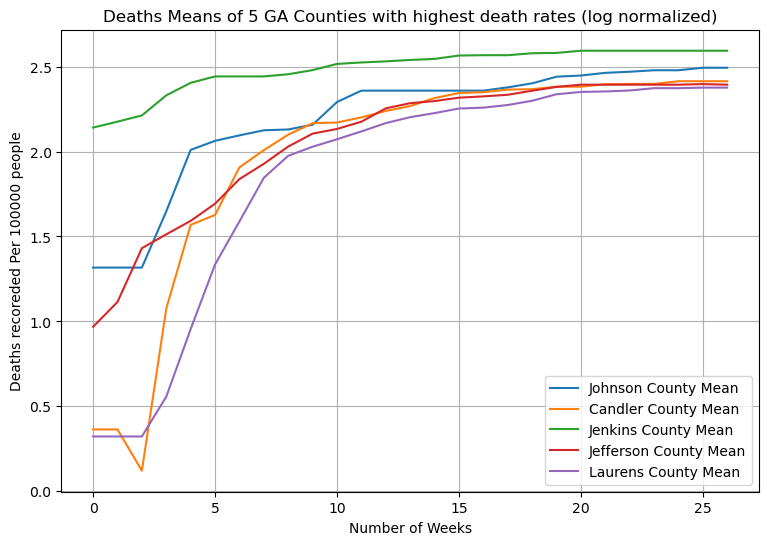

In [32]:
# Exception to remove the zeros from the Candler county array
candExcep = d_cand_means.T.to_numpy()
candExcep[candExcep == 0] = 0.25

# prepare the variables and display them in log normalized form
JohnDMean = np.log10((d_john_means.T.to_numpy()/9643)*100000)
CandDMean = np.log10((candExcep/10803)*100000)
JenkDMean = np.log10((d_jenk_means.T.to_numpy()/8676)*100000)
JeffDMean = np.log10((d_jeff_means.T.to_numpy()/15362)*100000)
LaurDMean = np.log10((d_laur_means.T.to_numpy()/47546)*100000)

x = np.arange(JohnCMean.shape[1])

plt.figure(figsize=(9,6))
plt.plot(x, JohnDMean[0, :], label='Johnson County Mean', marker='', linestyle='-')
plt.plot(x, CandDMean[0, :], label='Candler County Mean', marker='', linestyle='-')
plt.plot(x, JenkDMean[0, :], label='Jenkins County Mean', marker='', linestyle='-')
plt.plot(x, JeffDMean[0, :], label='Jefferson County Mean', marker='', linestyle='-')
plt.plot(x, LaurDMean[0, :], label='Laurens County Mean', marker='', linestyle='-')

plt.xlabel('Number of Weeks')
plt.ylabel('Deaths recoreded Per 100000 people')
plt.title('Deaths Means of 5 GA Counties with highest death rates (log normalized)')
plt.legend()

plt.grid(True)

#### From what I can see the cases per county does not closely match the state pattern that I was able to see from the previous graphs, But the deaths graph per county does match quite closely to the state death graph with it being a constant increase in new deaths every day. 